# Machine Learning project

by Dominik Krzemiński & Piotr Migdał

for El Passion, 2017

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as skl
import sklearn.linear_model as lm
import seaborn as sns
plt.style.use('ggplot')
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Data exploration

In [2]:
data = pd.read_csv("data/titanic.csv")

Let's take a look at the first 10 rows of the data.

In [3]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
6,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
7,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
8,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
9,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S


Let's summarize quantitative data.

In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,259.119524,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


## Visualization

In this part we will make some plots to better understand what our data can tell us about passengers.

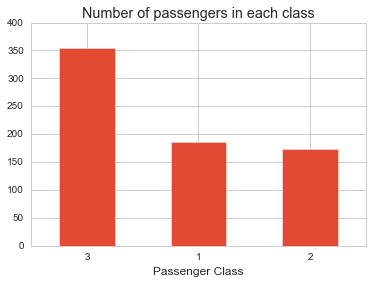

In [5]:
pd.value_counts(data.Pclass).plot(kind='bar', rot=1)
plt.title('Number of passengers in each class')
plt.xlabel('Passenger Class')
plt.show()

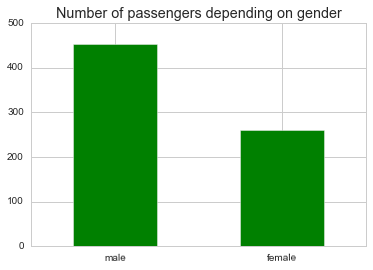

In [6]:
pd.value_counts(data.Sex).plot(kind='bar', rot=1, color='g')
plt.title('Number of passengers depending on gender')
plt.show()

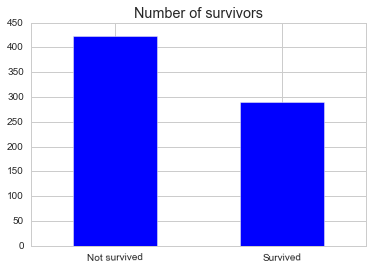

In [7]:
ax = plt.subplot(111)
pd.value_counts(data.Survived).plot(kind='bar', rot=1, color='b')
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Not survived'
labels[1] = 'Survived'
ax.set_xticklabels(labels)
plt.title('Number of survivors')
plt.show()

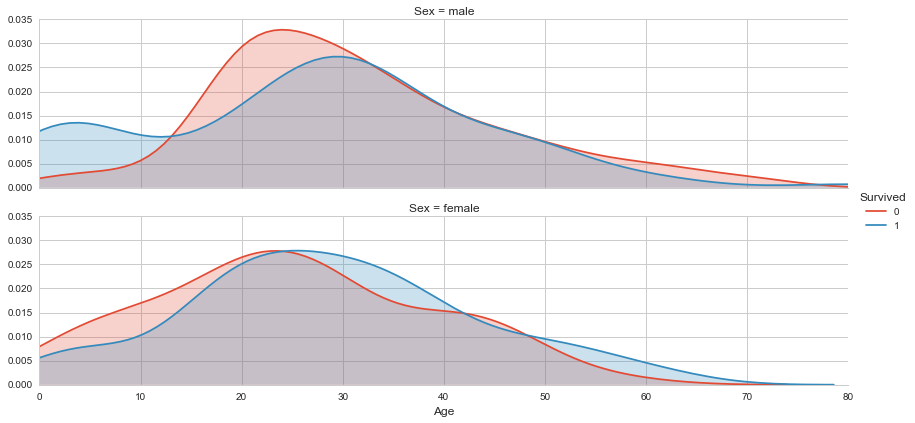

In [15]:
facet = sns.FacetGrid(data, hue='Survived' , aspect=4,row = 'Sex')
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, data['Age'].max()))
facet.add_legend()

All above pictures present relation of number of Titanic passengers depending on chosen features: age, gender, class. 

- First picture shows us that the majority of travellers were third class passengers;
- From second we can conclude that more than 60 % of them were males;
- Bar plot in third picture presents well-known fact that most passengers got drawned;
- From histograms above it's easily visible that passenger in the first order tried to save children and also that elder people had the lowest chances to survive.

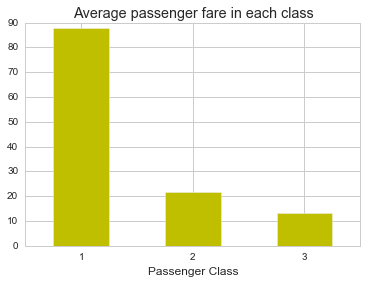

In [9]:
grdata = pd.groupby(data, 'Pclass')
#grdata.Fare.mean().plot('bar', color='y', rot=1)
grdata.Fare.mean().plot('bar', color='y', rot=1)
plt.title('Average passenger fare in each class')
plt.xlabel('Passenger Class')
plt.show()

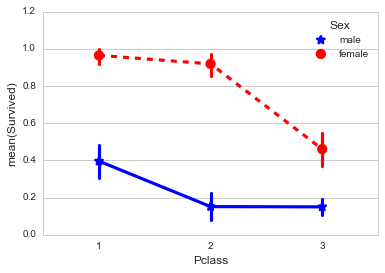

In [17]:
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=data,
              palette={"male": "blue", "female": "red"},
              markers=["*", "o"], linestyles=["-", "--"])
plt.show()

In the first picture we see an average fare depending on class. It's not surprising that the highest prices were in first class, but the difference between first and second is significant. What about chances to survive? From the second picture we see that well-off passengers had greater chances to survive, which also agree with image of the catastrophe from James Cameron movie.

## Prediction

Your task is to write classifier, which predicts `Survived` label from given Titanic data.

Before writing any code, think about following questions:

- what kind of problem you approach: regression or classification?

- what kind of algorithms you can use?

- what features are the most informative?

- how to test your classifier performance?

In [ ]:
preddataX = data[[ ... ]] # here specify interesting features as string separated by commas e.g. 'Age', 'Pclass'
# if you want to use gender code it to binary values
#preddataX['Sex'] = (preddataX['Sex']=='male').astype(int)
preddataX

preddataY = data['Survived']

############
# PROTIP
# use .dropna() to remove any rows with missing data
############

# transform to numpy arrays
X = preddataX.as_matrix() 
y = preddataY.as_matrix()

Let's split the data into train and test sets.

In [ ]:
X_train, X_test, y_train, y_test = cv.train_test_split(X, y, test_size=0.2)

That's all you need to perform the task. Good luck :)